In [2]:

import io
import os
import time
import datetime
import json
import shutil
import numpy as np
import pandas as pd
# import folium # draw route on map
from folium import plugins
import datetime
from datetime import timedelta
from pathlib import Path
from scipy.io import arff
import folium  # draw route on map
from folium import plugins
from PIL import Image

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
%matplotlib inline

import torch
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS,  DBSCAN, Birch 

from ts2vec import TS2Vec
import datautils

print(np.__version__)
print(pd.__version__)
print(torch.__version__)
!python3 --version

dir_training = Path('training')

1.19.2
1.3.3
1.8.1+cu111
Python 3.8.10


- def plot_scatter2d_c()

In [10]:
def plot_scatter2d_c(array=None, labels=None, title=None, cmap='coolwarm', s=1, alpha=0.8, save_path=None):
    fig, ax = plt.subplots()
    scatter = ax.scatter(array[:,0], array[:,1], 
                c=labels, cmap=cmap, s=s, alpha=alpha, 
                # edgecolors='black', lw=.03
                )
    plt.colorbar(scatter)
    fig.suptitle(title)
    fig.savefig(save_path, bbox_inches='tight')

### Load Model

In [2]:
!ls -l training
!ls -l training/dora_b16_320d

total 32
drwxrwxr-x 2 di5t00 di5t00 4096 十二 19 15:46 dora_b16_100d
drwxrwxrwx 2 di5t00 di5t00 4096 十二 15 08:58 dora_b16_320d
drwxrwxrwx 2 di5t00 di5t00 4096 十二 19 09:57 dora_b16_32d
drwxrwxr-x 2 di5t00 di5t00 4096 十二 19 11:12 dora__b16_500d_20221219_095812
drwxrwxr-x 2 di5t00 di5t00 4096 十二 19 19:20 dora__b16_500d_20221219_154528
drwxrwxr-x 2 di5t00 di5t00 4096 十二 19 15:45 dora_b16_50d
drwxrwxrwx 2 di5t00 di5t00 4096 十二 15 08:58 dora_b32_320d
drwxrwxrwx 2 di5t00 di5t00 4096 十二 14 17:09 dora_b8_320d
total 25120
-rw-rw-rw- 1 di5t00 di5t00 2571240 十二 14 16:45 model_100.pkl
-rw-rw-rw- 1 di5t00 di5t00 2571240 十二 14 16:45 model_150.pkl
-rw-rw-rw- 1 di5t00 di5t00 2571240 十二 14 16:45 model_200.pkl
-rw-rw-rw- 1 di5t00 di5t00 2571240 十二 14 16:45 model_250.pkl
-rw-rw-rw- 1 di5t00 di5t00 2571240 十二 14 16:45 model_300.pkl
-rw-rw-rw- 1 di5t00 di5t00 2571240 十二 14 16:45 model_350.pkl
-rw-rw-rw- 1 di5t00 di5t00 2571240 十二 14 16:45 model_400.pkl
-rw-rw-rw- 1 di5t00 di5t00 2571240 十二 14 16:45 model_450.

In [3]:
print([_ for _ in dir_training.glob('*')])

dir_sub = 'dora_b16_320d'
path_models = [_ for _ in (dir_training/dir_sub).glob('*')]
print(path_models)

[PosixPath('training/dora_b16_100d'), PosixPath('training/dora_b8_320d'), PosixPath('training/dora__b16_500d_20221219_095812'), PosixPath('training/dora_b32_320d'), PosixPath('training/dora_b16_320d'), PosixPath('training/dora_b16_50d'), PosixPath('training/dora_b16_32d'), PosixPath('training/dora__b16_500d_20221219_154528')]
[PosixPath('training/dora_b16_320d/model_150.pkl'), PosixPath('training/dora_b16_320d/model_450.pkl'), PosixPath('training/dora_b16_320d/model_200.pkl'), PosixPath('training/dora_b16_320d/model_350.pkl'), PosixPath('training/dora_b16_320d/model_500.pkl'), PosixPath('training/dora_b16_320d/model_100.pkl'), PosixPath('training/dora_b16_320d/model_400.pkl'), PosixPath('training/dora_b16_320d/model_50.pkl'), PosixPath('training/dora_b16_320d/model_250.pkl'), PosixPath('training/dora_b16_320d/model_300.pkl')]


In [4]:
# n_feature = 6
# # Train a TS2Vec model
# model = TS2Vec(
#     input_dims=n_feature,
#     device='cuda',
#     output_dims=320
# )


In [97]:
model_path = 'training/dora_b16_320d/model_500.pkl'
# model.load(model_path )

In [ ]:
model_path 

#### Get representation

In [125]:
# train_data = datautils.load_DORA('dora')
# train_data.shape

In [126]:
# # Compute instance-level representations for dataset
# embedding  = model.encode(train_data, encoding_window='full_series')  # n_instances x output_dims
# embedding.shape

In [20]:
# file_ = ck.split('/')[1] + '_' +  ck.split('/')[2]
# file_ = file_.lstrip('dora_').rstrip('.pkl').replace('model_', 'ck')

# print(f'{file_}')

save_path = Path('embedding')
save_path.mkdir(exist_ok=True, parents=True)

In [25]:
ck = f'b16_320d_ck500'
# np.savez_compressed(save_path/f'embedding_{ck}.npz', embedding=embedding)
# print(f'{save_path}/embedding_{file_}.npz saved') 

embedding = np.load(save_path/f'embedding_{ck}.npz',)['embedding']
print(f'{save_path}/embedding_{ck}.npz loaded')
print(embedding.shape)

embedding/embedding_b16_320d_ck500.npz loaded
(7972, 320)


In [ ]:
np.mean(embedding), np.std(embedding),  np.min(embedding),  np.max(embedding)

(0.2710515, 0.1653593, -0.2845076, 1.3143266)

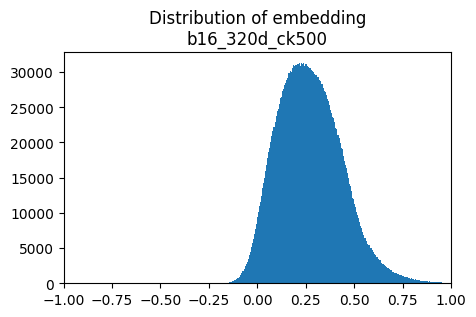

In [ ]:
figsize = (5,3)
title =  f'Distribution of embedding'
title += f'\n{ck}'

fig, ax = plt.subplots(figsize=figsize,)
ax.hist(embedding.reshape(-1), bins=300 )
ax.set_xlim([-1, 1])
ax.set_title(title);

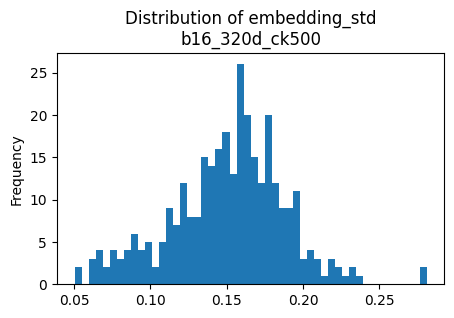

In [12]:
title =  f'Distribution of embedding_std'
title += f'\n{ck}'
embed_std = pd.DataFrame(embedding).std()
embed_std.plot.hist(bins=50, figsize = (5,3), title=title); 


### Dimension Reduction

#### PCA

explained_variance_ratio : 75.23%  [0.13068703 0.10659955 0.08447701 0.06860568 0.05609418 0.0440462
 0.03112773 0.03026876 0.02938572 0.02121985 0.01963331 0.01871228
 0.01465333 0.01243032 0.01018711 0.01011606 0.00889316 0.0083864
 0.00744378 0.00684476 0.00640184 0.00600293 0.00554225 0.00533025
 0.00461936 0.00457868]
Number of factors : 26


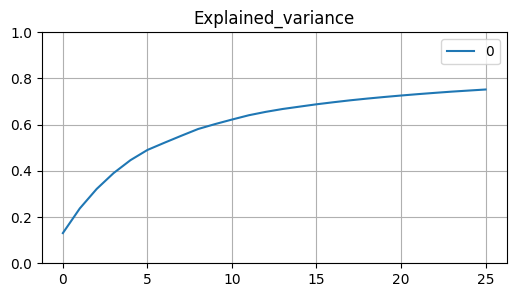

In [31]:
# n_components = 3
# pca = PCA(n_components=n_components)
pca = PCA(0.75)
pca.fit(embedding)
explained_v_ratio = pca.explained_variance_ratio_.sum()
print(f'explained_variance_ratio : {100*explained_v_ratio:.2f}%  {pca.explained_variance_ratio_}')
print(f'Number of factors : {len(pca.explained_variance_ratio_)}')
# explained_variance_ratios.append(100*explained_variance_ratio)
# print(f'N : {n:2d}, N_union : {len(index_n_ubnions[n-1]):3d}, Explained_variance_ratio : {100*explained_variance_ratio:.2f} %', end='\r')

title = 'Explained_variance'
pd.DataFrame(pca.explained_variance_ratio_).cumsum().plot(title=title , figsize=(6,3), ylim=(0,1), grid=True);

pca_embed = pca.transform(embedding)

### UMAP

In [16]:
!ls embedding/ |grep umap

umap2d200n_embedding_b16_320d_ck100.npz
umap2d200n_embedding_b16_320d_ck250.npz
umap2d200n_embedding_b16_320d_ck500.npz
umap2d200n_embedding_b32_320d_ck500.npz
umap2d200n_embedding_b512_320d_ck450.npz
umap3d200n_embedding_b16_320d_ck100.npz
umap3d200n_embedding_b16_320d_ck250.npz
umap3d200n_embedding_b16_320d_ck500.npz
umap3d200n_embedding_b32_320d_ck500.npz
umap3d200n_embedding_b512_320d_ck450.npz


In [ ]:
# np.random.seed(42)

# n_sample = embedding.shape[0]
# n_neighbors = 200 if n_sample*0.1 > 200 else n_sample*0.1 
# n_neighbors

# n_components = 2

# reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=n_components, random_state=0, verbose=True)
# umap_embed  = reducer.fit_transform(embedding)



In [4]:
save_path = Path('embedding')
file_umap_2d = f'umap2d200n_embedding_{ck}'
# file_umap_3d = f'umap3d200n_embedding_{ck}'

print(file_umap_2d, )

# print(file_umap_3d )

umap_embed = np.load(save_path/f'{file_umap_2d}.npz',)['embedding']
print(umap_embed.shape)

umap2d200n_embedding_b16_50d_ck500
(7972, 2)


---

## Check hyperparameter
- number of epoch
- number of batch

In [5]:
def plot_scatter2d(ndarray:np.ndarray=None, path_:str=None, title:str=None):
    
    fig, ax = plt.subplots()
    ax.scatter(ndarray[:,0], ndarray[:,1])
    ax.set_title(title)
    fig.savefig(path_/f'{title}.png', bbox_inches='tight')
    plt.close(fig);
    
save_plot = Path('plot/umap')
save_plot.mkdir(exist_ok=True, parents=True)


####  Number of Dimension
- Not yet done

In [ ]:
dims =  [50, 100, 320, 500]
n_col =len(dims)
h = 2.5
w = h*n_col*1.1
figsize=(w,h)
fig, axs = plt.subplots(1, n_col, figsize=figsize, sharex=True, sharey=True, )

for i, (d, ax) in enumerate(zip(dims, axs)):
    ck = f'b16_{d}d_ck500'
    file_umap_2d = f'umap2d200n_embedding_{ck}'
    umap_embed = np.load(save_path/f'{file_umap_2d}.npz',)['embedding']
    ax.scatter(umap_embed[:,0], umap_embed[:,1], s=0.1)
    ax.set_title(f'Dim : {d}')
    
title = f'Umap2d_b16_Dimensions'
fig.suptitle(title, y=1.05)
fig.savefig(save_plot/f'{title}.png', bbox_inches='tight')

- Note : Dimensions
    - dim=50 get more significant cluseter   
![](plot/umap/Umap2d_b16_Dimensions.png)

####  Number of Epoch

In [ ]:

# for ck_ in [100, 200, 300, 400, 500]:
#     ck = f'b16_320d_ck{ck_}'
#     file_umap_2d = f'umap2d200n_embedding_{ck}'
#     umap_embed = np.load(save_path/f'{file_umap_2d}.npz',)['embedding']
#     title = f'umap_2d_{ck}'
#     plot_scatter2d(umap_embed, save_plot, title)
    
# # longer is better

##### plot multiple subplots : Epoch


In [ ]:
epochs =  [100, 200, 300, 400, 500]
n_col =len(epochs)
h = 2.5
w = h*n_col*1.1
figsize=(w,h)
fig, axs = plt.subplots(1, n_col, figsize=figsize, sharex=True, sharey=True, )

for i, (e, ax) in enumerate(zip(epochs, axs)):
    ck = f'b16_320d_ck{e}'
    file_umap_2d = f'umap2d200n_embedding_{ck}'
    umap_embed = np.load(save_path/f'{file_umap_2d}.npz',)['embedding']
    ax.scatter(umap_embed[:,0], umap_embed[:,1], s=0.1)
    ax.set_title(f'Epoch : {e}')
    
title = f'Umap2d_b16_Epoch'
fig.suptitle(title, y=1.05)
fig.savefig(save_plot/f'{title}.png', bbox_inches='tight')


- Note : epochs
    - Longer is better
    - Epochs between 300-500 are similar  
![](plot/umap/Umap2d_b16_Epoch.png)

####  Number of Batch

In [7]:
# for batch_ in [8, 16, 32, 512]:
#     ck = f'b{batch_}_320d_ck500'
#     file_umap_2d = f'umap2d200n_embedding_{ck}'
#     umap_embed = np.load(save_path/f'{file_umap_2d}.npz',)['embedding']
#     title = f'umap_2d_{ck}'
#     plot_scatter2d(umap_embed, save_plot, title)
    
# b
# # The larger the batch, the more data points cannot be separated
# # batch btw 8-16 is good 

##### plot multiple subplots : Batch


In [ ]:
batchs = [8, 16, 32, 512]
n_col =len(batchs)
h = 2.5
w = h*n_col*1.1
figsize=(w,h)
fig, axs = plt.subplots(1, n_col, figsize=figsize, sharex=True, sharey=True, )

for i, (b, ax) in enumerate(zip(batchs , axs)):
    ck = f'b{b}_320d_ck500'
    file_umap_2d = f'umap2d200n_embedding_{ck}'
    umap_embed = np.load(save_path/f'{file_umap_2d}.npz',)['embedding']
    ax.scatter(umap_embed[:,0], umap_embed[:,1], s=0.1)
    ax.set_title(f'Batch : {b}')
    
title = f'Umap2d_320d_500e_Batch'
fig.suptitle(title, y=1.05)
fig.savefig(save_plot/f'{title}.png', bbox_inches='tight')


- Note : batch
    - The larger the batch, the more data points cannot be separated
    - batch btw 8-16 is good  
![](plot/umap/Umap2d_320d_500e_Batch.png)

## Validate the data
Plot and label
- Vehicle model
- The length of the data

#### Label by Vehicle model

- get label : Vehicle model

In [35]:
!ls -l datasets/DORA 

total 37544
-rwxrwxrwx 1 yunghui yunghui  4981634 Dec 16 08:30 df_event_all_v1.feather
-rwxrwxrwx 1 yunghui yunghui  1995325 Dec 16 08:30 dora.npz
-rwxrwxrwx 1 yunghui yunghui 26512655 Dec 16 08:30 dora_meta.csv
-rwxrwxrwx 1 yunghui yunghui  4945077 Dec 13 16:28 dora_meta.zip


In [36]:
file = 'datasets/DORA/dora_meta.csv'
 
meta = pd.read_csv(file , index_col=0 )
meta

,gsen_X,gsen_Y,gsen_Z,gyro_X,gyro_Y,gyro_Z,vehicle_id,event_id,id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,timestamp_conv
v_event_id,,,,,,,,,,,,,,,,,
KA01AF2992_1,-0.176844,0.358919,0.423661,0.002701,-0.008408,0.024567,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458092,5458091,2022-07-27 06:04:39.193
KA01AF2992_1,-0.329202,0.359760,0.588206,-0.009552,-0.026398,0.026062,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458294,5458294,2022-07-27 06:04:39.193
KA01AF2992_1,-0.477587,0.359269,0.645035,-0.017120,-0.044296,0.024033,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458492,5458492,2022-07-27 06:04:39.193
KA01AF2992_1,0.128577,0.172681,-2.081446,0.012604,0.011200,0.024353,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458692,5458692,2022-07-27 06:04:39.193
KA01AF2992_1,-0.198447,0.187229,0.825244,-0.003693,0.012802,0.021576,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458893,5458892,2022-07-27 06:04:39.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MH04KF8187_1097,2.914450,-1.703996,0.351263,-0.035446,0.013611,0.028122,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565018,27565017,2022-10-03 01:10:55.906
MH04KF8187_1097,-2.949032,0.460132,-2.437326,-0.027237,0.004761,0.020874,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565217,27565216,2022-10-03 01:10:55.906
MH04KF8187_1097,1.892698,0.242738,-0.230687,-0.003052,-0.002045,-0.032181,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565416,27565416,2022-10-03 01:10:55.906


In [80]:
col_sel = ['vehicle_id', 'event_id']
meta[col_sel].drop_duplicates(subset=col_sel)


labels = meta[col_sel].drop_duplicates(subset=col_sel).vehicle_id.values

labels

array(['KA01AF2992', 'KA01AF2992', 'KA01AF2992', ..., 'MH04KF8187',
       'MH04KF8187', 'MH04KF8187'], dtype=object)

In [81]:


n_label = len(np.unique(labels))
label2n = dict(zip(np.unique(labels), range(n_label)))
print(label2n)
n2label = {v: k for k, v in label2n.items()}
print(n2label)

labels_n = np.array([label2n[l] for l in labels])
labels_n


{'KA01AF2992': 0, 'KA01AF482': 1, 'KA04MW6569': 2, 'KA51AG8742': 3, 'MH04KF8187': 4}
{0: 'KA01AF2992', 1: 'KA01AF482', 2: 'KA04MW6569', 3: 'KA51AG8742', 4: 'MH04KF8187'}


array([0, 0, 0, ..., 4, 4, 4])

In [82]:
n2label = {v: k for k, v in label2n.items()}


In [83]:

ck = f'b16_320d_ck500'
file_umap_2d = f'umap2d200n_embedding_{ck}'
print(file_umap_2d, )
# file_umap_3d = f'umap3d200n_embedding_{file_}'
# print(file_umap_3d )aa

umap_embed = np.load(f'embedding/{file_umap_2d}.npz',)['embedding']
print(umap_embed.shape)

umap2d200n_embedding_b16_320d_ck500
(7972, 2)


In [84]:
data = (pd.DataFrame(umap_embed, index=labels)
        .reset_index()
        .set_axis(['vehicle_id', '0', '1'], axis=1)
        )
data

,vehicle_id,0,1
0,KA01AF2992,0.681804,3.910311
1,KA01AF2992,0.519109,4.145055
2,KA01AF2992,1.011202,4.024651
3,KA01AF2992,0.986677,4.143525
4,KA01AF2992,-1.558785,7.599085
...,...,...,...
7967,MH04KF8187,11.436852,2.201727
7968,MH04KF8187,11.761259,2.850136
7969,MH04KF8187,11.685315,3.276277
7970,MH04KF8187,11.595533,2.398893


- plot Vehicle model

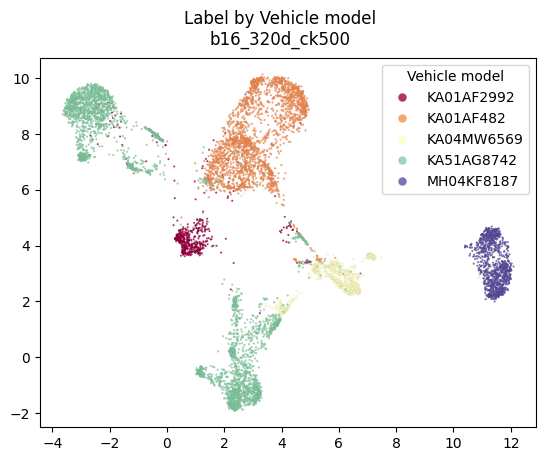

In [90]:
save_plot = Path('plot/umap')
title =  f'Label by Vehicle model'
title += f'\n{ck}'

fig, ax = plt.subplots()
scatter = ax.scatter(umap_embed[:,0], umap_embed[:,1], 
            c=labels_n, cmap='Spectral', s=2, alpha=0.8, edgecolors='black', lw=.03
            )
# ax.set_title(title)

# ax.legend(labels=labels, title='Vehicle model', ncol=2, markerscale=3, frameon=True)
# # 取出legen元素，圖標 handles與 標籤labels
handles, labels = scatter.legend_elements()  # labels
label_list = [n2label[int(labels[l].split("{")[1].split("}")[0])] for l in range(len(labels))]  # 將編碼過的數字標籤反轉換為文字
ax.legend(
#     *scatter.legend_elements(),
    handles=handles, labels=label_list,
    title='Vehicle model', ncol=1, markerscale=1, )
fig.suptitle(title)
fig.savefig(save_plot/f'{title}.png', bbox_inches='tight');
# plt.close(fig);

#### Note:
- 各車輛型號間的sensor資料差異還是大於駕駛行為本身 

#### Label by Speed

##### Label by Speed - mean

In [183]:
file = 'datasets/DORA/dora_meta.csv'
meta = pd.read_csv(file , index_col=0 )


,gsen_X,gsen_Y,gsen_Z,gyro_X,gyro_Y,gyro_Z,vehicle_id,event_id,id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,timestamp_conv
v_event_id,,,,,,,,,,,,,,,,,
KA01AF2992_1,-0.176844,0.358919,0.423661,0.002701,-0.008408,0.024567,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458092,5458091,2022-07-27 06:04:39.193
KA01AF2992_1,-0.329202,0.359760,0.588206,-0.009552,-0.026398,0.026062,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458294,5458294,2022-07-27 06:04:39.193
KA01AF2992_1,-0.477587,0.359269,0.645035,-0.017120,-0.044296,0.024033,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458492,5458492,2022-07-27 06:04:39.193
KA01AF2992_1,0.128577,0.172681,-2.081446,0.012604,0.011200,0.024353,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458692,5458692,2022-07-27 06:04:39.193
KA01AF2992_1,-0.198447,0.187229,0.825244,-0.003693,0.012802,0.021576,KA01AF2992,1,39079362,13.094135,77.594326,4.390037,185.001465,1658901879193,5458893,5458892,2022-07-27 06:04:39.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MH04KF8187_1097,2.914450,-1.703996,0.351263,-0.035446,0.013611,0.028122,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565018,27565017,2022-10-03 01:10:55.906
MH04KF8187_1097,-2.949032,0.460132,-2.437326,-0.027237,0.004761,0.020874,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565217,27565216,2022-10-03 01:10:55.906
MH04KF8187_1097,1.892698,0.242738,-0.230687,-0.003052,-0.002045,-0.032181,MH04KF8187,1097,56817252,21.219641,72.968640,3.287662,359.055634,1664759455906,27565416,27565416,2022-10-03 01:10:55.906


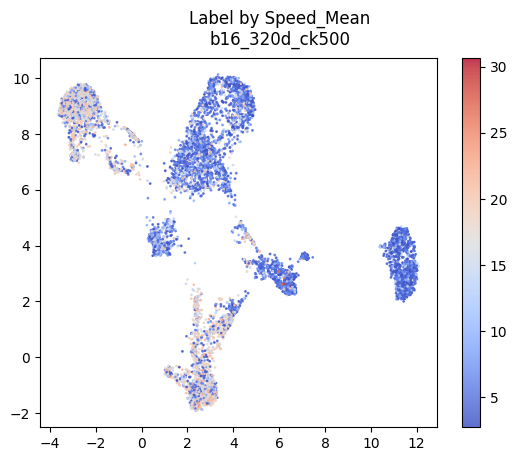

In [86]:
labels = meta.groupby('v_event_id').speed.mean().values

save_plot = Path('plot/umap')
title =  f'Label by Speed_Mean'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed, labels=labels, title=title , save_path=save_path)

##### Label by Speed - std

In [246]:
labels = meta.groupby('v_event_id').speed.std().values

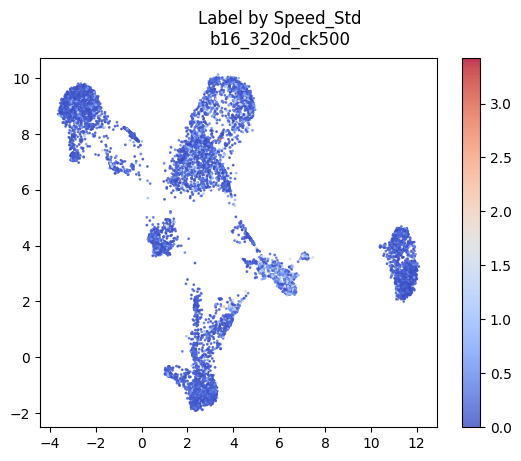

In [247]:
save_plot = Path('plot/umap')
title =  f'Label by Speed_Std'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed, labels=labels, title=title , save_path=save_path)

#### Label by Sensor

In [220]:
file = 'datasets/DORA/dora_meta.csv'
meta = pd.read_csv(file , index_col=0 )


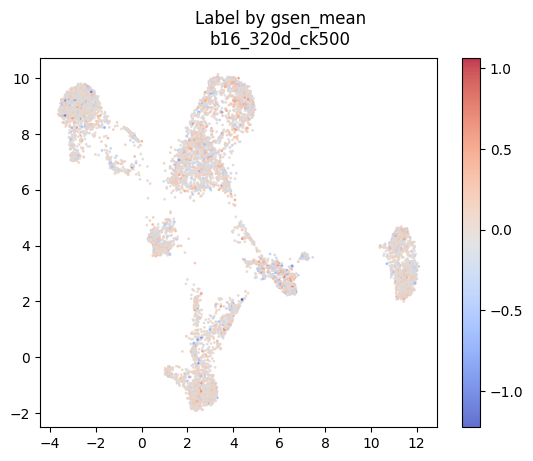

In [252]:
labels = meta.filter(regex='gsen_[XYZ]$').groupby('v_event_id').mean().mean(axis=1)
save_plot = Path('plot/umap')
title =  f'Label by gsen_mean'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed, labels=labels, title=title , save_path=save_path)


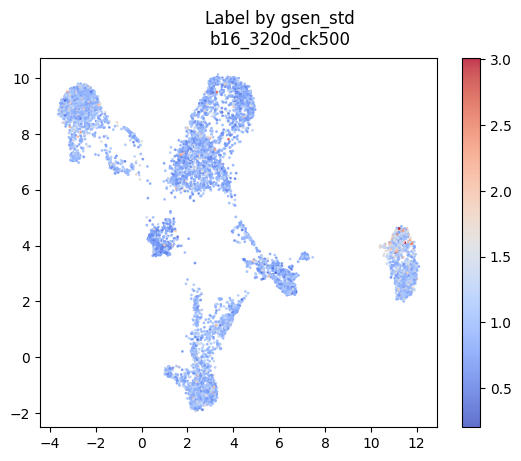

In [272]:
labels = meta.filter(regex='gsen_[XYZ]$').groupby('v_event_id').std().mean(axis=1)
save_plot = Path('plot/umap')
title =  f'Label by gsen_std'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed, labels=labels, title=title , save_path=save_path)

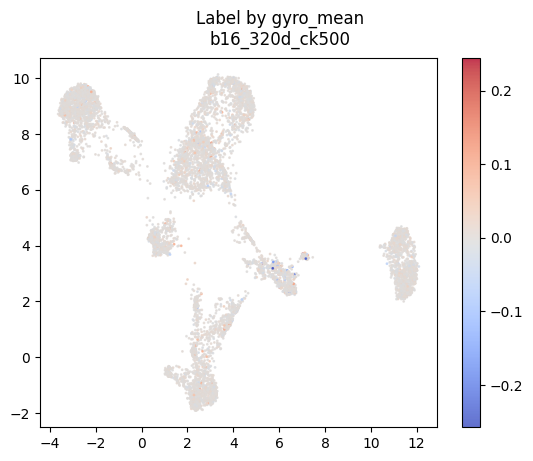

In [300]:
labels = meta.filter(regex='gyro_[XYZ]$').groupby('v_event_id').mean().mean(axis=1)
save_plot = Path('plot/umap')
title =  f'Label by gyro_mean'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed, labels=labels, title=title , save_path=save_path)

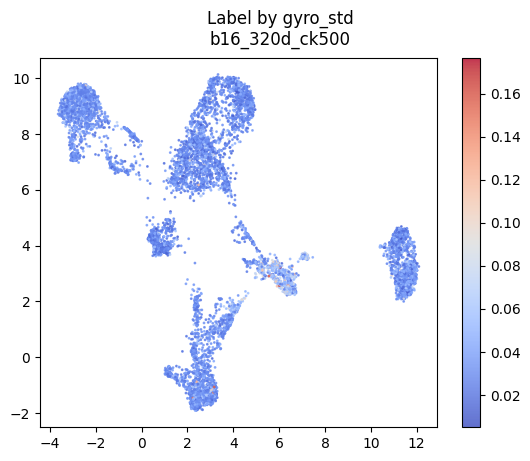

In [ ]:
labels = meta.filter(regex='gyro_[XYZ]$').groupby('v_event_id').std().mean(axis=1)
save_plot = Path('plot/umap')
title =  f'Label by gyro_std'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed, labels=labels, title=title , save_path=save_path)

#### Label by Timestamp

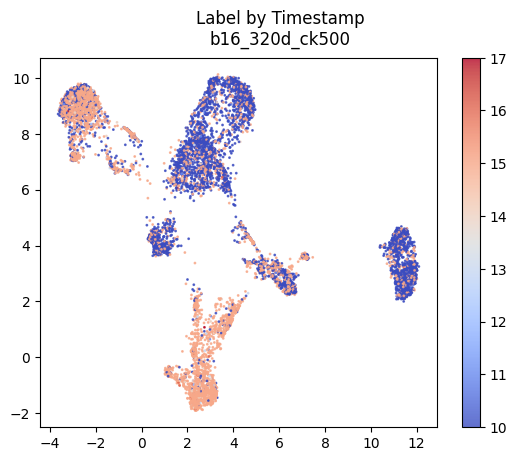

In [87]:
labels = meta.groupby('v_event_id').id.count().values

save_plot = Path('plot/umap')
title =  f'Label by Timestamp'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed, labels=labels, title=title , save_path=save_path)

---

### Pick single vehicle 

In [136]:
meta.vehicle_id.unique()

array(['KA01AF2992', 'KA01AF482', 'KA04MW6569', 'KA51AG8742',
       'MH04KF8187'], dtype=object)

In [350]:
v_model = 'KA51AG8742'
ck = f'b16_320d_ck500'


file = 'datasets/DORA/dora_meta.csv'
meta = pd.read_csv(file , index_col=0)
meta['timestamp_conv'] = meta['timestamp_conv'].astype('datetime64[ms]')

meta_vehicle_id  = meta.groupby(['vehicle_id', 'event_id']).id.count().reset_index().drop(['id'], axis=1)
meta_vehicle_id 

In [30]:
# load umap embedding
idx_v = meta_vehicle_id.query('vehicle_id == @v_model').index.values
umap_embed_v  = umap_embed[idx_v,:]
print(umap_embed_v.shape)

(3266, 2)


#### Label by abnormal detect result from CH

In [36]:
v_model = 'KA51AG8742'
ck = f'b16_320d_ck500'


file = 'datasets/DORA/dora_meta.csv'
meta = pd.read_csv(file , index_col=0)
meta['timestamp_conv'] = meta['timestamp_conv'].astype('datetime64[ms]')

meta_vehicle_id  = meta.groupby(['vehicle_id', 'event_id']).id.count().reset_index().drop(['id'], axis=1)
meta_vehicle_id 

,vehicle_id,event_id
0,KA01AF2992,1
1,KA01AF2992,2
2,KA01AF2992,3
3,KA01AF2992,4
4,KA01AF2992,7
...,...,...
7967,MH04KF8187,1093
7968,MH04KF8187,1094
7969,MH04KF8187,1095
7970,MH04KF8187,1096


In [37]:
idx_v = meta_vehicle_id.query('vehicle_id == @v_model').index.values

# print(embedding[idx_v,:].shape)

In [38]:

col_sel = ['event_id', 'anomaly']
res = pd.read_csv('datasets/DORA/result_AbnormalDetect.csv', index_col=0)[col_sel]
res

,event_id,anomaly
0,1,True
1,2,True
2,3,False
3,4,True
4,5,True
...,...,...
3300,3301,False
3301,3302,False
3302,3303,True
3303,3304,False


In [39]:
temp_ab = (meta_vehicle_id.query('vehicle_id==@v_model')
           .merge(res, left_on='event_id', right_on='event_id', how='left')
           )
temp_ab

,vehicle_id,event_id,anomaly
0,KA51AG8742,1,True
1,KA51AG8742,2,True
2,KA51AG8742,3,False
3,KA51AG8742,4,True
4,KA51AG8742,5,True
...,...,...,...
3261,KA51AG8742,3301,False
3262,KA51AG8742,3302,False
3263,KA51AG8742,3303,True
3264,KA51AG8742,3304,False


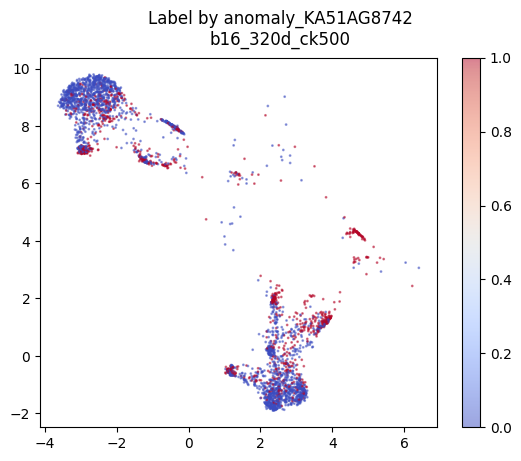

In [41]:
labels = temp_ab.anomaly
save_plot = Path('plot/umap')
title =  f'Label by anomaly_{v_model}'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed_v, labels=labels, s=1.0, alpha=0.5, title=title , save_path=save_path)

#### Label

In [43]:
temp = meta.query('vehicle_id==@v_model').groupby('v_event_id')

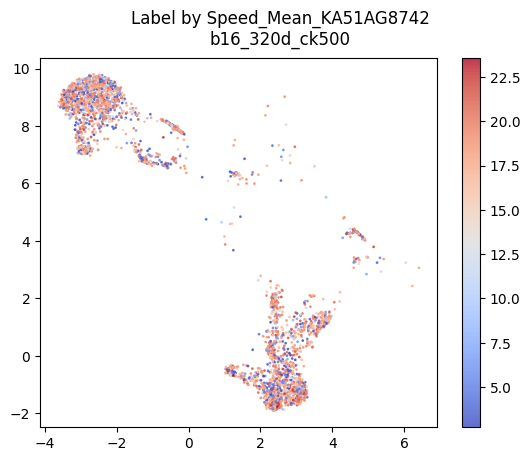

In [44]:
labels = temp.speed.mean().values

save_plot = Path('plot/umap')
title =  f'Label by Speed_Mean_{v_model}'
save_path = save_plot/f'{title}.png'
title += f'\n{ck}'

plot_scatter2d_c(umap_embed_v, labels=labels, title=title, save_path=save_path )

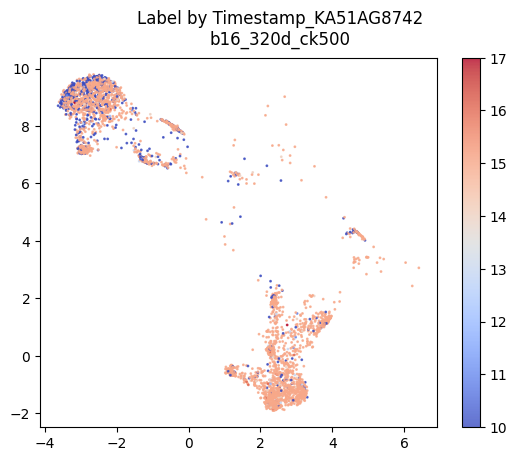

In [45]:
labels = temp.id.count().values

save_plot = Path('plot/umap')
title =  f'Label by Timestamp_{v_model}'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed_v, labels=labels, title=title , save_path=save_path)

- Label by hours

In [46]:
hours = meta.timestamp_conv.astype(str).apply(lambda x : x.split(' ')[-1].split(':')[0]).astype(int)
print(hours.nunique())

hours


24


v_event_id
KA01AF2992_1       6
KA01AF2992_1       6
KA01AF2992_1       6
KA01AF2992_1       6
KA01AF2992_1       6
                  ..
MH04KF8187_1097    1
MH04KF8187_1097    1
MH04KF8187_1097    1
MH04KF8187_1097    1
MH04KF8187_1097    1
Name: timestamp_conv, Length: 99552, dtype: int64

In [47]:
meta['hour'] = hours

temp_hour = (meta[['vehicle_id','event_id', 'hour']]
        .drop_duplicates(['vehicle_id','event_id'])
        .query('vehicle_id==@v_model') 
        )
temp_hour

,vehicle_id,event_id,hour
v_event_id,,,
KA51AG8742_1,KA51AG8742,1,13
KA51AG8742_2,KA51AG8742,2,13
KA51AG8742_3,KA51AG8742,3,13
KA51AG8742_4,KA51AG8742,4,13
KA51AG8742_5,KA51AG8742,5,13
...,...,...,...
KA51AG8742_3301,KA51AG8742,3301,15
KA51AG8742_3302,KA51AG8742,3302,15
KA51AG8742_3303,KA51AG8742,3303,15


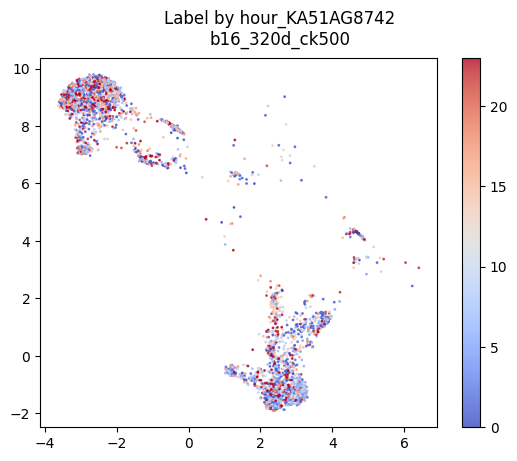

In [48]:
labels = temp_hour.hour.values
save_plot = Path('plot/umap')
title =  f'Label by hour_{v_model}'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed_v, labels=labels, title=title , save_path=save_path)

- Label by datetime

In [49]:
dates = (meta.query('vehicle_id==@v_model')
         .drop_duplicates(['vehicle_id','event_id'])
         .timestamp_conv.values)

years = dates.astype('datetime64[Y]').astype(int) + 1970
months = dates.astype('datetime64[M]').astype(int) % 12 + 1
# days = dates - dates.astype('datetime64[M]') + 1
months

array([5, 5, 5, ..., 9, 9, 9])

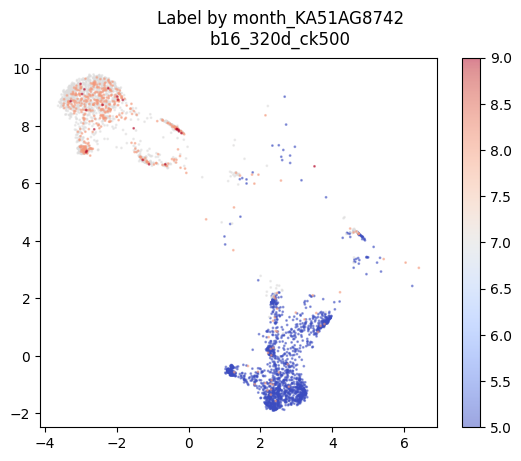

In [50]:
labels = months
save_plot = Path('plot/umap')
title =  f'Label by month_{v_model}'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed_v, labels=labels, s=1.0, alpha=0.5, title=title , save_path=save_path)

- Label by geo

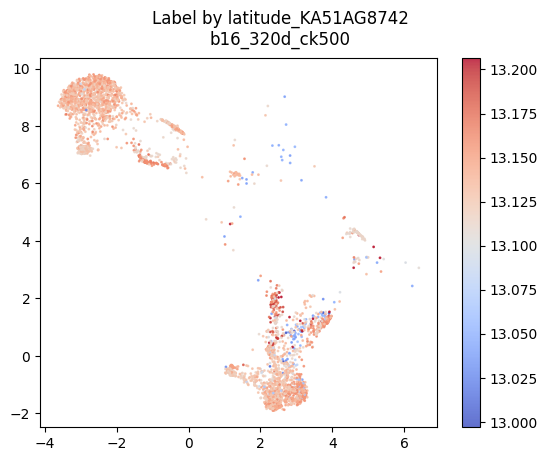

In [51]:
temp_lat = (meta[['vehicle_id','event_id', 'latitude']]
        .drop_duplicates(['vehicle_id','event_id'])
        .query('vehicle_id==@v_model') 
        )
temp_lat

labels = temp_lat.latitude.values
save_plot = Path('plot/umap')
title =  f'Label by latitude_{v_model}'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed_v, labels=labels, title=title , save_path=save_path)

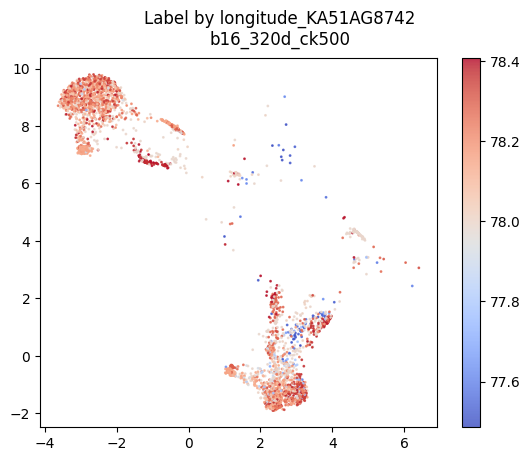

In [52]:
temp_lon = (meta[['vehicle_id','event_id', 'longitude']]
        .drop_duplicates(['vehicle_id','event_id'])
        .query('vehicle_id==@v_model') 
        )
labels = temp_lon.longitude.values
save_plot = Path('plot/umap')
title =  f'Label by longitude_{v_model}'
title += f'\n{ck}'
save_path = save_plot/f'{title}.png'

plot_scatter2d_c(umap_embed_v, labels=labels, title=title , save_path=save_path)

### Clustering, view signal profile

In [33]:
data = umap_embed_v  # embedding[idx_v] or umap_embed_v

In [61]:
c_method = 'OPTICS'

min_samples = 5
max_eps = 50 # np.inf
xi = 0.05

clustering = OPTICS(min_samples=min_samples, max_eps=max_eps, xi=xi, n_jobs=10).fit(data)
cluster_labels_ = clustering.labels_
n_labels = len(np.unique(cluster_labels_))
print(f'Number of clusters : {n_labels}')
print(f'outlier_perc : = {(np.sum(cluster_labels_== -1)/ len(cluster_labels_))*100 :.2f} %')
cluster_labels_


Number of clusters : 204
outlier_perc : = 47.89 %


array([ -1,  11,  12, ...,  -1, 168,  -1])

In [256]:
# c_method = 'DBSCAN'

# min_samples = 5
# eps = 1.0

# clustering = DBSCAN(min_samples=min_samples, eps=eps).fit(data)
# cluster_labels_ = clustering.labels_
# n_labels = len(np.unique(cluster_labels_))
# print(f'Number of clusters : {n_labels}')
# print(f'outlier_perc : = {(np.sum(cluster_labels_== -1)/ len(cluster_labels_))*100 :.2f} %')
# cluster_labels_


Number of clusters : 2
outlier_perc : = 0.00 %


array([0, 0, 0, ..., 1, 1, 1])

In [62]:
birch_model = Birch(threshold=1.7, n_clusters=None)

birch_model.fit(data)

# Plot result
cluster_labels_ = birch_model.labels_
centroids = birch_model.subcluster_centers_
n_clusters = np.unique(cluster_labels_).size
print(f'Number of clusters : {n_clusters}')
print(centroids)

Number of clusters : 5
[[ 2.59045005 -0.31353754]
 [ 1.7338165   6.26930952]
 [ 4.46101332  3.74496627]
 [-2.71059012  8.69857693]
 [-0.80846137  7.39691496]]


''

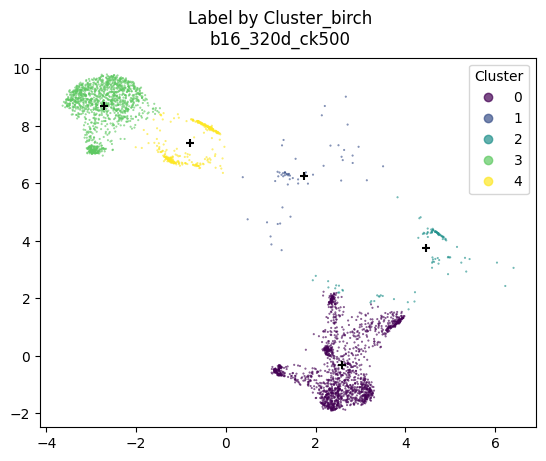

In [91]:
path_cluster_ = Path(f'plot/cluster_birch')
path_cluster_.mkdir(exist_ok=True, parents=True)
title =  f'Label by Cluster_birch'
title += f'\n{ck}'

fig, ax = plt.subplots()
scatter = ax.scatter(umap_embed_v[:,0], umap_embed_v[:,1],
           marker=".", c=cluster_labels_, s=1, alpha=0.7, cmap='viridis'
           )
# 取出legen元素，圖標 handles與 標籤labels
handles, labels_ = scatter.legend_elements()  # labels
# label_list = [n2label[int(labels[l].split("{")[1].split("}")[0])] for l in range(len(labels))]  # 將編碼過的數字標籤反轉換為文字
ax.legend(
#     *scatter.legend_elements(),
    handles=handles, labels=labels_,
    title='Cluster', ncol=1, markerscale=1, )
fig.suptitle(title)
ax.scatter(centroids[:,0], centroids[:,1], marker="+", c="k", s=35)

fig.savefig(path_cluster_/f'{title}.png', bbox_inches='tight');


In [55]:
meta_vehicle_id

,vehicle_id,event_id
0,KA01AF2992,1
1,KA01AF2992,2
2,KA01AF2992,3
3,KA01AF2992,4
4,KA01AF2992,7
...,...,...
7967,MH04KF8187,1093
7968,MH04KF8187,1094
7969,MH04KF8187,1095
7970,MH04KF8187,1096


In [56]:
cluster_id = {}
for c_ in range(n_clusters):
    mask = (cluster_labels_ == c_)
    cluster_id[c_] = meta_vehicle_id.query('vehicle_id == @v_model').iloc[mask].event_id.values
cluster_id.keys() 

for k, v in cluster_id.items():
    print(k, len(v))

0 1533
1 55
2 101
3 1268
4 309


#### 抽樣檢視群核心點的資料輪廓

- 取出與核心點最近的10筆資料的index

In [64]:
save_path = Path('embedding')
file_umap_2d = f'umap2d200n_embedding_{ck}'

print(file_umap_2d, )
umap_embed = np.load(save_path/f'{file_umap_2d}.npz',)['embedding']
print(umap_embed.shape)

umap2d200n_embedding_b16_320d_ck500
(7972, 2)


In [92]:
n = 10

cen_close_event = {}

for c_ in range(n_clusters):
    cen_ = centroids[c_]
   
    # get the index most colse to centroid by cluster
    idx_ = cluster_id[c_]
    distance_ = np.linalg.norm(umap_embed[idx_] - cen_,  axis=1, ord=2)
    close_idx_ = np.argsort(distance_)[:10]
    close_idx_

    # idx to event
    close_event_ = meta_vehicle_id.iloc[close_idx_].event_id.values
    
    cen_close_event[c_] = close_event_
    
    print(f'Cluster : {c_}, close_event : {close_event_}')


Cluster : 0, close_event : [ 54 431  62 394  95 989 393 213 921 922]
Cluster : 1, close_event : [39 24 45  2 47 15  4  3 25 10]
Cluster : 2, close_event : [ 12 104 100 105  99 103  97 101  98 102]
Cluster : 3, close_event : [ 37 289 192  50 158 369 172 557 382 310]
Cluster : 4, close_event : [139 221  46 208  87  97 108 104 142 161]


- copy event_profile files by cluster

In [69]:
import shutil

In [95]:

for c_, event_ in cen_close_event.items():
    path_cluster_ = Path(f'plot/cluster_birch/{c_}')
    path_cluster_.mkdir(exist_ok=True, parents=True)
    dir_src = Path(f'plot/{v_model}')
    dir_dst = path_cluster_
    
    for e in event_:
        print(f'Cluster : {c_}, event : {e}', end='\r') 
        file_ = f'{v_model}_event{e}'
        profile_file_ = file_ + '.png'
        map_file_ = file_ + '_map.png'
        
        src = dir_src/profile_file_ 
        src_map = dir_src/map_file_ 
        
        dst = dir_dst/profile_file_ 
        dst_map = dir_dst/map_file_ 

        try:
            if src.exists():
                shutil.copyfile(src, dst)
            if src_map.exists():
                shutil.copyfile(src_map, dst_map)
        except:
            print(f'{src_map} not found')
    
    # break